# Data Preparation

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import os
import pandas as pd

#Import the data using the file path

from google.colab import drive
drive.mount('/content/drive')

data_path = ['drive', 'My Drive', 'CapstoneProject']

filepath = os.sep.join(data_path + ['dataset.csv'])
data = pd.read_csv(filepath, encoding='latin-1')
print('Data shape: {}'.format(data.shape))

print(f"Pandas version = {pd.__version__}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data shape: (2459, 3)
Pandas version = 1.5.3


In [ ]:
data.head()

,OpticalDiagnosisCode,ServiceItemName,Void
0,HYPERMETROPIA,FUCITHALMIC 10mg/g,N
1,HYPOTONY,NEVANAC (Nepafenac 0.1%),Y
2,ACCOMODATION AND CONVERGENCE ABNORMALITIES,PATADAY (Olopatadine HCL 0.2%),N
3,DIABETIC MACULAR ISCHAEMIA-DIABETIC MACULOPATHY,TIMOLOL-POS 0.5%,N
4,DISCIFORM KERATITIS-HERPES SIMPLEX KERATITIS,CUSIVIRAL,Y


In [ ]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'OpticalDiagnosisCode': ['HYPERMETROPIA' 'HYPOTONY' 'ACCOMODATION AND CONVERGENCE ABNORMALITIES'
 'DIABETIC MACULAR ISCHAEMIA-DIABETIC MACULOPATHY'
 'DISCIFORM KERATITIS-HERPES SIMPLEX KERATITIS'
 'LATENT ANGLE-CLOSURE GLAUCOMA-PRIMARY ANGLE-CLOSURE GLAUCOMA'
 'LID LESION' 'FUCHS ENDOTHELIAL DYSTROPHY-CORNEAL DYSTROPHIES'
 'GLAUCOMA SUSPECT'
 'CHRONIC ANGLE-CLOSURE GLAUCOMA-PRIMARY ANGLE-CLOSURE GLAUCOMA'
 'CONGENITAL GLAUCOMA'
 'ACQUIRED NASOLACRIMAL DUCT OBSTRUCTION-LACRIMAL OBSTRUCTION'
 'EPIBLEPHARON-MISCELLANEOUS CONGENITAL DISORDERS' 'ESOTROPIA'
 'ACTIVE TED-THYROID EYE DISEASE'
 'ACUTE ALLERGIC OEDEMA-ALLERGIC DISORDERS'
 'ADENOVIRAL KERATOCONJUCTIVITIS-VIRAL CONJUNCTIVITIS'
 'BAND KERATOPATHY-CORNEAL DEGENERATIONS' 'BLUNT TRAUMA-GLOBE TRAUMA'
 'CENTRAL RETINAL ARTERY OCCLUSION-RETINAL ARTERY OCCLUSION'
 'INFLAMMATORY GLAUCOMA' 'IOL OPACIFICATION' 'CORNEA HAZE'
 'DELLEN-PERIPHERAL CORNEAL DISORDERS'
 'EXUDATIVE MYOPIC MACULOPATHY-MYOPIC MACULOPATHY'
 'EXT

# Change fields from String to Numbers


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
#change the ServiceItemName from string to numbers using LabelEncoder
ServiceItemName = le.fit_transform(data['ServiceItemName'])

In [ ]:
#change the OpticalDiagnosisCode from string to numbers using LabelEncoder
OpticalDiagnosisCode = le.fit_transform(data['OpticalDiagnosisCode'])

In [ ]:
#change the Void from string to numbers using LabelEncoder
Void = le.fit_transform(data['Void'])

In [ ]:
#Put the encoded labels into a dataframe cdata

cdata =pd.DataFrame({'ServiceItemName':ServiceItemName, 'OpticalDiagnosisCode':OpticalDiagnosisCode, 'Void':Void})
cdata

,ServiceItemName,OpticalDiagnosisCode,Void
0,27,26,0
1,43,27,1
2,50,0,0
3,67,12,0
4,15,13,1
...,...,...,...
2454,53,1,1
2455,3,8,0
2456,57,8,0
2457,22,8,0


#Split data into train and test

In [ ]:
# Split the data into features (X) and target (y)
dropped_col = ['Void']

#input
X = cdata.drop(dropped_col, axis=1)

#output
y = cdata[dropped_col]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Logistic regression

In [ ]:
# Hyperparameter tuning
#{'newton-cg', 'saga', 'sag', 'liblinear', 'lbfgs', 'newton-cholesky'}
# Train a logistic regression model
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
# Predict the void value based on diagnosis and prescription
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6443089430894309


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/pytho

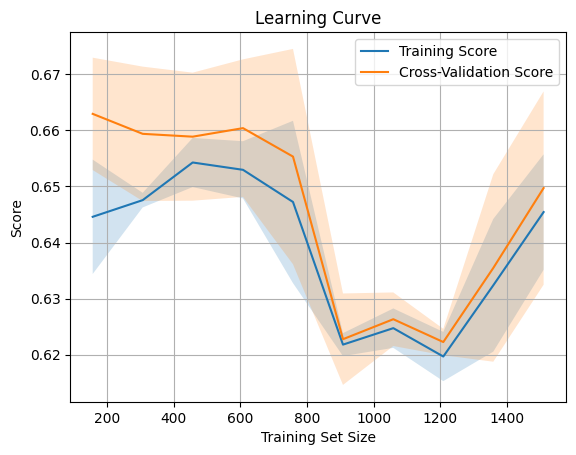

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pylab as plt

# Define the training set sizes at which the learning curve will be calculated
train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1, 0.96,10))


# Calculate the mean and standard deviation of the training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of the validation scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_mean, label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, val_mean, label='Cross-Validation Score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Model Evaluation metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

# Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.6443089430894309
Precision Score : 0.34782608695652173
Recall Score : 0.047619047619047616
F1 Score : 0.0837696335078534
Confusion Matrix : 
[[309  15]
 [160   8]]


In [ ]:
# store the predicted probabilities for class 1 - Probability of Unreliable
y_pred1 = model.predict_proba(X_test)[:, 1]
y_pred1

array([0.26655366, 0.20525977, 0.30056715, 0.38192918, 0.50820697,
       0.29209745, 0.35166177, 0.33900227, 0.20438902, 0.29426148,
       0.20879379, 0.31379153, 0.34813442, 0.20879379, 0.22231746,
       0.31379153, 0.43613838, 0.29191084, 0.53448827, 0.20525977,
       0.266742  , 0.48913242, 0.27205236, 0.28837248, 0.52375981,
       0.38192918, 0.40852352, 0.31936104, 0.35166177, 0.20438902,
       0.30183792, 0.46597932, 0.27186379, 0.21149755, 0.43464655,
       0.22694344, 0.26271378, 0.31936104, 0.36838008, 0.28519241,
       0.40933862, 0.52912752, 0.29209745, 0.20028531, 0.35166177,
       0.20186553, 0.28203309, 0.20879379, 0.46597932, 0.4788377 ,
       0.41521468, 0.35166177, 0.40705958, 0.38372762, 0.30056715,
       0.31639827, 0.35166177, 0.31926005, 0.48375107, 0.30056715,
       0.41374306, 0.28856131, 0.46597932, 0.35166177, 0.29209745,
       0.26198289, 0.48913242, 0.29209745, 0.3057748 , 0.41374306,
       0.2026601 , 0.40397046, 0.31379153, 0.43139078, 0.20186

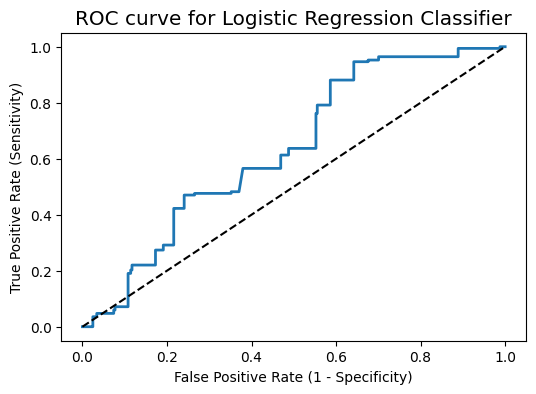

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Logistic Regression Classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest classifier
rf_y_pred = rf_model.predict(X_test)

# Predict using Random Forest classifier
rf_y_pred_train = rf_model.predict(X_train)
rf_y_pred_test = rf_model.predict(X_test)

# Compute training accuracy for Random Forest classifier
rf_train_accuracy = accuracy_score(y_train, rf_y_pred_train)
print("Random Forest Training Accuracy:", rf_train_accuracy)

# Evaluate Random Forest classifier
rf_test_accuracy = accuracy_score(y_test, rf_y_pred_test)
print("Random Forest Test Accuracy:", rf_test_accuracy)


<ipython-input-104-2291dd043594>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Random Forest Training Accuracy: 0.9928825622775801
Random Forest Test Accuracy: 0.9939024390243902


In [ ]:
#Hyperparameter tuning using gridsearchcv
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}


# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


grid_search.fit(X_train, y_train)
rf_best = grid_search.best_estimator_
rf_best

Fitting 4 folds for each of 180 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

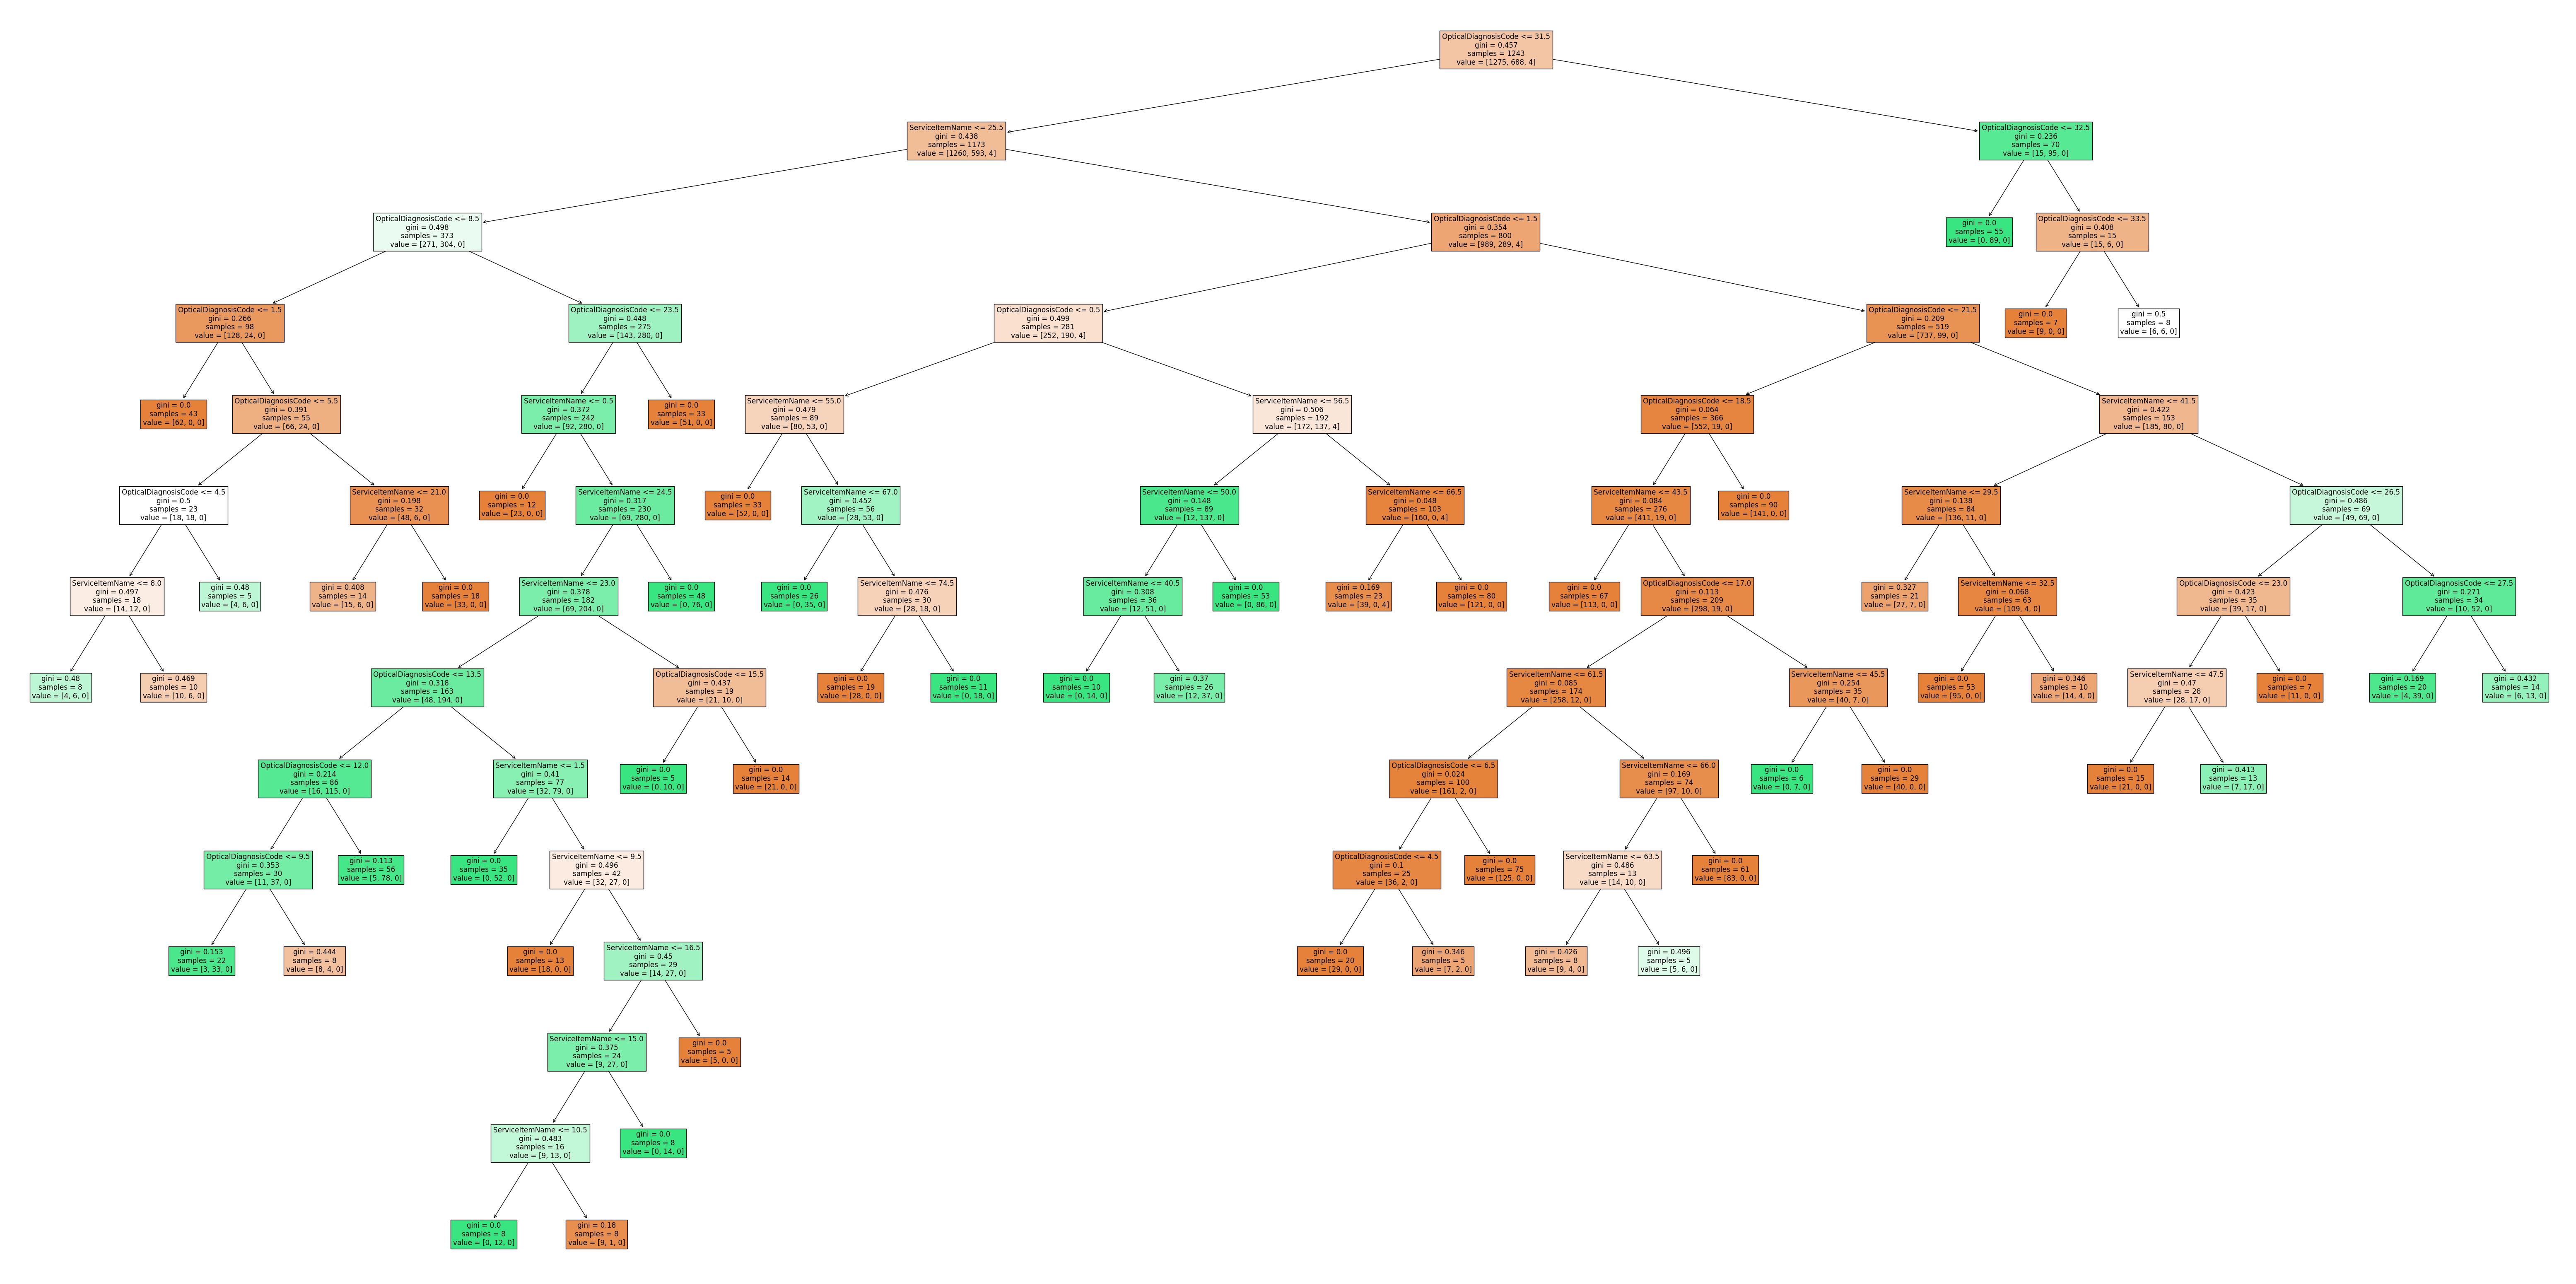

In [ ]:
#plot tree graph
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns, filled=True);

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

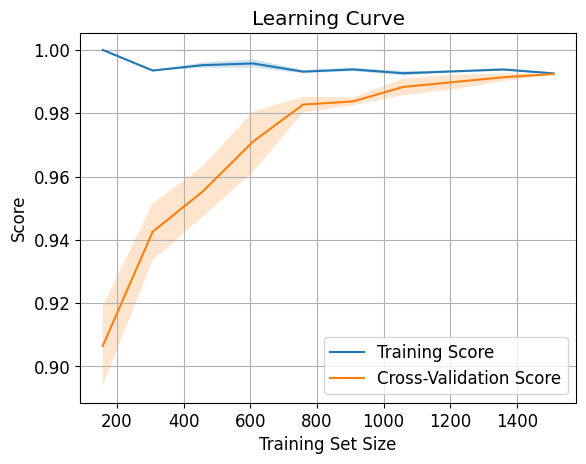

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pylab as plt
# Define the training set sizes at which the learning curve will be calculated
train_sizes, train_scores, val_scores = learning_curve(rf_model, X_train, y_train, train_sizes = np.linspace(0.1, 0.96,10))  # You can adjust the number of points as needed


# Calculate the mean and standard deviation of the training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of the validation scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_mean, label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, val_mean, label='Cross-Validation Score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Model Evaluation metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,rf_y_pred)))
print('Precision Score : ' + str(precision_score(y_test,rf_y_pred)))
print('Recall Score : ' + str(recall_score(y_test,rf_y_pred)))
print('F1 Score : ' + str(f1_score(y_test,rf_y_pred)))

Accuracy Score : 0.9939024390243902
Precision Score : 0.9824561403508771
Recall Score : 1.0
F1 Score : 0.9911504424778761


#SVM

In [ ]:
# Train a Support Vector Machine classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict using Support Vector Machine classifier
svm_y_pred_train = svm_model.predict(X_train)
svm_y_pred_test = svm_model.predict(X_test)

# Compute training accuracy for Support Vector Machine classifier
svm_train_accuracy = accuracy_score(y_train, svm_y_pred_train)
print("SVM Training Accuracy:", svm_train_accuracy)

# Evaluate Support Vector Machine classifier
svm_test_accuracy = accuracy_score(y_test, svm_y_pred_test)
print("SVM Test Accuracy:", svm_test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Training Accuracy: 0.6609049313675648
SVM Test Accuracy: 0.6585365853658537


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/pytho

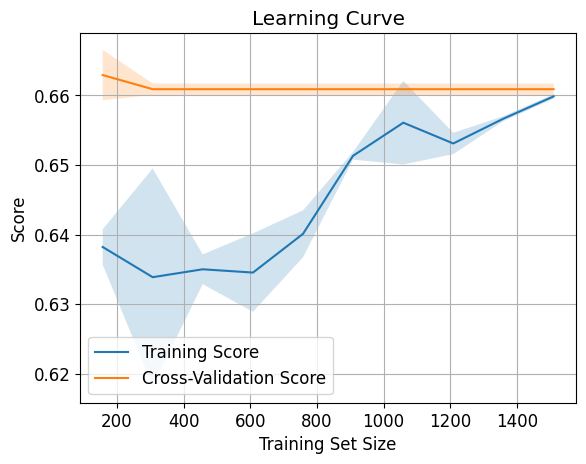

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pylab as plt
# Define the training set sizes at which the learning curve will be calculated
train_sizes, train_scores, val_scores = learning_curve(svm_model, X_train, y_train, train_sizes = np.linspace(0.1, 0.96,10))  # You can adjust the number of points as needed


# Calculate the mean and standard deviation of the training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of the validation scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_mean, label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, val_mean, label='Cross-Validation Score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)

#Download the model with the best accuracy

In [ ]:
# saving the model into pkl file
import pickle
pickle_out = open("rf.pkl", mode = "wb")
pickle.dump(rf_model, pickle_out)
pickle_out.close()

#Test model

In [ ]:
import numpy as np
# Fit the LabelEncoder on the labels in the diagnosis column
led = LabelEncoder()
led.fit(data['OpticalDiagnosisCode'])

# Fit the LabelEncoder on the labels in the prescription column
lep = LabelEncoder()
lep.fit(data['ServiceItemName'])

diagnosis = 'HYPOTONY'
prescription= 'CUSIVIRAL'

encoded_value1 = led.transform([diagnosis])
encoded_value2 = lep.transform([prescription])

# Create a nested list
nested_list = [encoded_value1, encoded_value2]

# Convert nested list to a NumPy array
result_array = np.array(nested_list)

# Create the desired 2D array
reshaped_array = [list(row) for row in result_array]

# Convert to the desired 2D array
reshaped_array1 = [sublist[0] for sublist in reshaped_array]

# Convert the list to a NumPy array
reshaped_array3 = np.array(reshaped_array1)

# Reshape the array to a 2D array with one row and as many columns as needed
reshaped_array4 = reshaped_array3.reshape(1, -1)

print (encoded_value1, encoded_value2)
test_output=rf_model.predict(reshaped_array4)

print (test_output)

[27] [15]
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
